In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_files_path = "airplanedataset/Train/"
test_files_path = "airplanedataset/Test/"

img = load_img(test_files_path + "B-52/3-1.jpg")

In [3]:
print(img_to_array(img).shape)

(230, 266, 3)


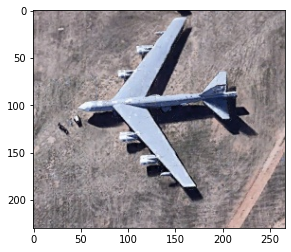

In [4]:
plt.imshow(img)

In [5]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size=(224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size=(224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [6]:
numberOfAirplaneTypes = 5

In [7]:
vgg = VGG16()

553476096/553467096 [==============================] - 337s 1us/step


In [8]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x000001B507031AF0>, <keras.layers.convolutional.Conv2D object at 0x000001B50704B2E0>, <keras.layers.convolutional.Conv2D object at 0x000001B50703ADC0>, <keras.layers.pooling.MaxPooling2D object at 0x000001B507047C40>, <keras.layers.convolutional.Conv2D object at 0x000001B5070315B0>, <keras.layers.convolutional.Conv2D object at 0x000001B507047AF0>, <keras.layers.pooling.MaxPooling2D object at 0x000001B507042E80>, <keras.layers.convolutional.Conv2D object at 0x000001B507043E80>, <keras.layers.convolutional.Conv2D object at 0x000001B507040B50>, <keras.layers.convolutional.Conv2D object at 0x000001B507042220>, <keras.layers.pooling.MaxPooling2D object at 0x000001B50703B9A0>, <keras.layers.convolutional.Conv2D object at 0x000001B50704BFA0>, <keras.layers.convolutional.Conv2D object at 0x000001B507037E50>, <keras.layers.convolutional.Conv2D object at 0x000001B50704CE20>, <keras.layers.pooling.MaxPooling2D object at 0x000001B50704D3A0>, <keras.

In [9]:
vgg_model_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range (vgg_model_layersize_tobe_used):
    model.add(vgg_layers[i])

In [10]:
for layers in model.layers:
    layers.trainable = False
    
model.add(Dense(numberOfAirplaneTypes, activation='softmax'))    

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
batch_size = 4

model.fit_generator(train_data,
                    steps_per_epoch=400//batch_size,
                    epochs=3,
                    validation_data = test_data,
                    validation_steps= 200//batch_size
                   )

C:\Users\asus\AppData\Local\Temp/ipykernel_3636/1891507873.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


Epoch 1/3
100/100 [==============================] - 243s 2s/step - loss: 0.6504 - accuracy: 0.8129 - val_loss: 0.3060 - val_accuracy: 0.8800


### Predictions

In [23]:
img = Image.open('f22.jpg').resize((224,224))

In [24]:
img = np.array(img)
img.shape

(224, 224, 3)

In [25]:
img = img.reshape(-1,224,224,3)
img.shape

(1, 224, 224, 3)

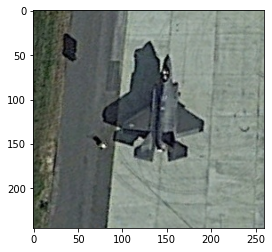

In [26]:
img = preprocess_input(img)
img_for_display = load_img('f22.jpg')
plt.imshow(img_for_display)
plt.show()

In [27]:
preds = model.predict(img)

In [28]:
preds

array([[2.9345238e-04, 6.8684138e-05, 6.8493921e-04, 9.9892151e-01,
        3.1469081e-05]], dtype=float32)

In [29]:
img_class = ['A-10','B-52','E-3','F-22','KC-10']
result = np.argmax(preds[0])
print(img_class[result])

F-22
